### importing the libraries

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import json

import warnings
warnings.filterwarnings('ignore') #Supress unnecessary warnings for readability and cleaner presentation

# Assignment-1

In [137]:
df = pd.read_csv('allitems (1).csv',  encoding='latin-1')

df

,Name,Status,Description,References,Phase,Votes,Comments
0,CVE-1999-0001,Candidate,ip_input.c in BSD-derived TCP/IP implementatio...,BUGTRAQ:19981223 Re: CERT Advisory CA-98.13 - ...,Modified (20051217),"MODIFY(1) Frech | NOOP(2) Northcutt, W...",Christey> A Bugtraq posting indicates that the...
1,CVE-1999-0002,Entry,Buffer overflow in NFS mountd gives root acces...,BID:121 | URL:http://www.securityfocus.com...,NaN,NaN,NaN
2,CVE-1999-0003,Entry,Execute commands as root via buffer overflow i...,BID:122 | URL:http://www.securityfocus.com...,NaN,NaN,NaN
3,CVE-1999-0004,Candidate,"MIME buffer overflow in email clients, e.g. So...",CERT:CA-98.10.mime_buffer_overflows | MS:M...,Modified (19990621),"ACCEPT(8) Baker, Cole, Collins, Dik, Landfi...","Frech> Extremely minor, but I believe e-mail i..."
4,CVE-1999-0005,Entry,Arbitrary command execution via IMAP buffer ov...,BID:130 | URL:http://www.securityfocus.com...,NaN,NaN,NaN
...,...,...,...,...,...,...,...
211686,CVE-2021-3632,Candidate,** RESERVED ** This candidate has been reserve...,NaN,Assigned (20210701),None (candidate not yet proposed),NaN
211687,CVE-2021-3633,Candidate,** RESERVED ** This candidate has been reserve...,NaN,Assigned (20210701),None (candidate not yet proposed),NaN
211688,CVE-2021-3634,Candidate,** RESERVED ** This candidate has been reserve...,NaN,Assigned (20210702),None (candidate not yet proposed),NaN
211689,CVE-2021-3635,Candidate,** RESERVED ** This candidate has been reserve...,NaN,Assigned (20210702),None (candidate not yet proposed),NaN


In [138]:
df.isnull().sum()

Name                0
Status              0
Description         0
References      55394
Phase            3054
Votes            3054
Comments       209836
dtype: int64

In [139]:
final_df = df[['Name', 'Description']]

In [140]:
final_df['Name'] = final_df['Name'].apply(lambda x:x.split('-')[1]).astype(int)

In [141]:
# total 
total_attack  = final_df['Description'].shape[0]

In [142]:
# SQL injection dataframe with year and description
sql_inj_df = final_df[final_df['Description'].str.contains('SQL injection') == True].reset_index()

In [143]:
sql_inj_df

,index,Name,Description
0,2800,2000,SQL injection vulnerability in read.php3 and o...
1,2803,2000,SQL injection vulnerability in mod_sql in Orac...
2,4152,2001,TWIG 2.6.2 and earlier allows remote attackers...
3,4183,2001,The PostgreSQL authentication modules (1) mod_...
4,4205,2001,Bugzilla before 2.14 does not properly escape ...
...,...,...,...
7675,208135,2021,The affected product is vulnerable to a SQL in...
7676,209188,2021,In Progress MOVEit Transfer before 2019.0.6 (1...
7677,210451,2021,Django 3.1.x before 3.1.13 and 3.2.x before 3....
7678,210457,2021,Vulnerability in Fidelis Network and Deception...


In [144]:
final_df

,Name,Description
0,1999,ip_input.c in BSD-derived TCP/IP implementatio...
1,1999,Buffer overflow in NFS mountd gives root acces...
2,1999,Execute commands as root via buffer overflow i...
3,1999,"MIME buffer overflow in email clients, e.g. So..."
4,1999,Arbitrary command execution via IMAP buffer ov...
...,...,...
211686,2021,** RESERVED ** This candidate has been reserve...
211687,2021,** RESERVED ** This candidate has been reserve...
211688,2021,** RESERVED ** This candidate has been reserve...
211689,2021,** RESERVED ** This candidate has been reserve...


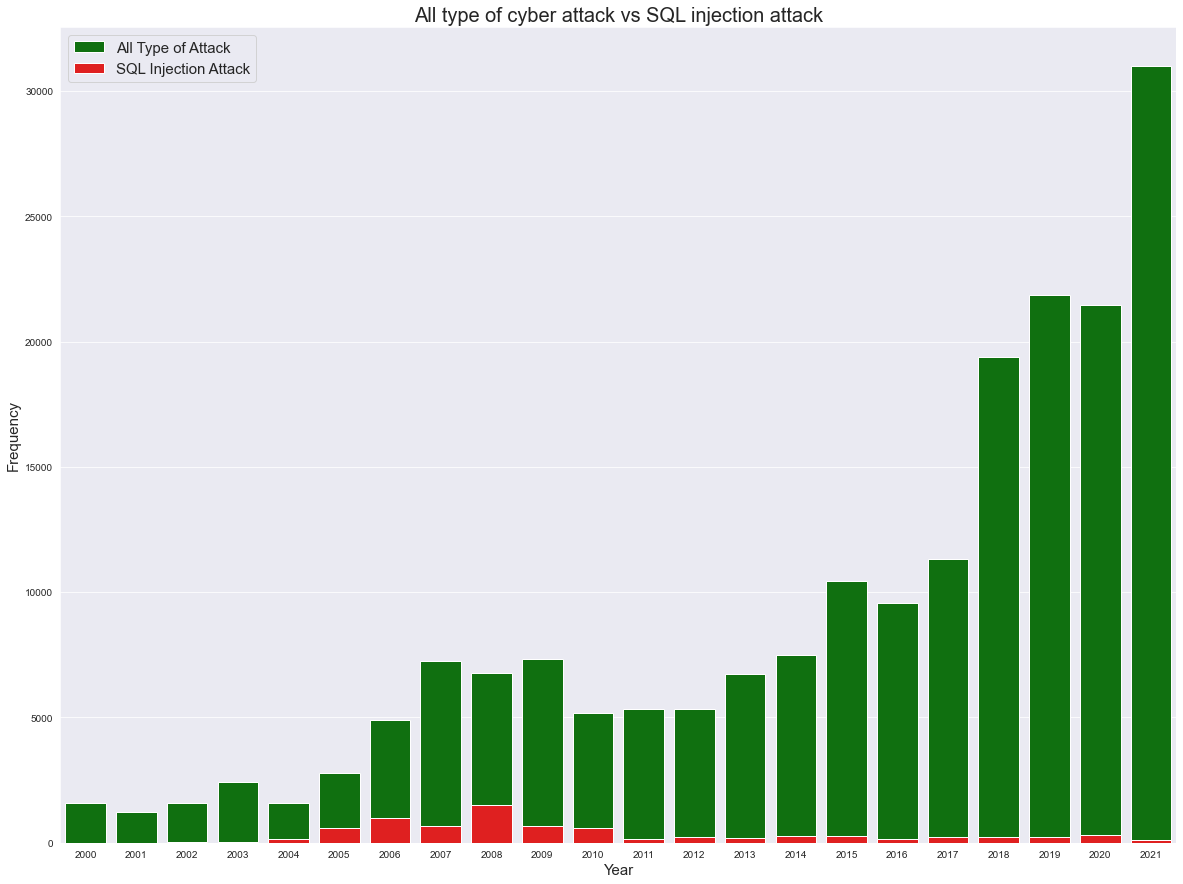

In [148]:
# Data frame from all type of attack baesed on year

plt.figure(figsize = (20,15))
sns.set_style('darkgrid')


# final df
v = final_df['Name'].value_counts()
sns.barplot(x = v.index, y = v, color = 'green',  label = 'All Type of Attack')  # all type of attack


# SQL injection df
v1 = sql_inj_df['Name'].value_counts()
sns.barplot(x = v1.index, y = v1, color = 'red', label  = 'SQL Injection Attack') # only SQl injection attack


plt.title('All type of cyber attack vs SQL injection attack', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.legend(loc='upper left', fontsize = 15)
plt.show()

__Insights:__
- From the analysis , red color shows the sql injection attacked based on the year.
- From the analysis, green color shows the all type of attack based on  the year

# Assignement-2

In [149]:
total_sql_attack  =  sql_inj_df.shape[0]

In [150]:
v1 = sql_inj_df['Name'].value_counts()

In [151]:
percentage = round((v1/total_sql_attack*100), 2)

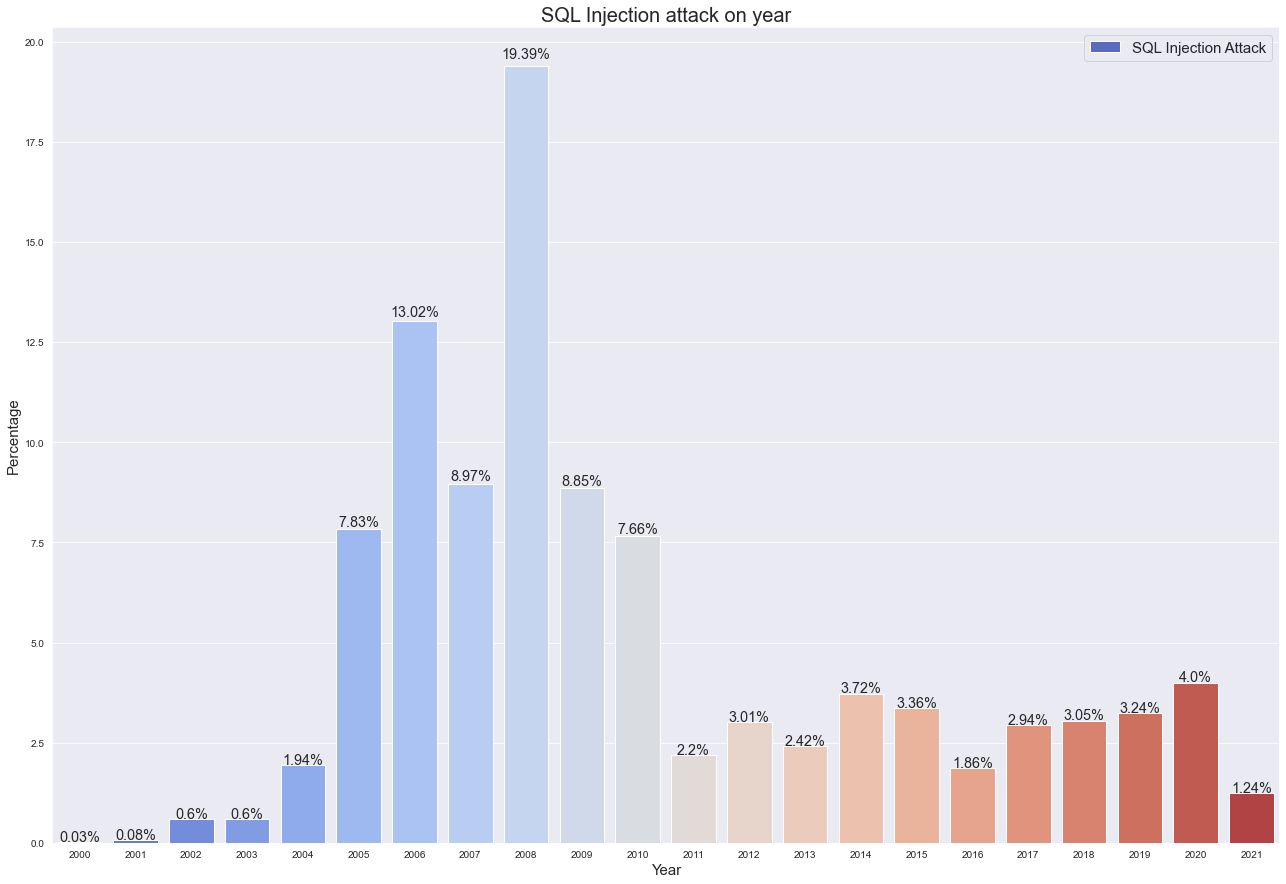

In [152]:
plt.figure(figsize = (22,15))
sns.set_style('darkgrid')

ax  =  sns.barplot(x = percentage.index, y = percentage, label  = 'SQL Injection Attack', palette = 'coolwarm') # only SQl injection attack


for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy() 
    ax.annotate(f'{height}%', (x + width/2, y + height*1.01), ha='center', fontsize = 'x-large')
    

plt.title('SQL Injection attack on year', fontsize = 20)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.legend(loc='upper right', fontsize = 15)
plt.show() 


__Insights:__
- From the analysis , we can see that highest sql injection attack happend in __2005__ to __2010__ and lowest sql injection attack happend in __2000__ to __2004__ .

- From the analysis, most of the sql injection  attack happend in __2008__ which was __19.39%__ . 
- From the analysis, least sql injection  attack  happend in __2000__ which was __0.03%__ .

# Assignment - 3

In [4]:
with open("nvdcve-1.1-2020.json", encoding='utf-8', errors='ignore') as json_data:
     data = json.load(json_data, strict=False)

In [14]:
# totle 
len(data['CVE_Items'])

17566

### saving the data into list

In [113]:
base_score_list = []
description_list = []

In [114]:
for i in  data['CVE_Items']:
    
    des = i['cve']['description']['description_data'][0]['value'] # description
    description_list.append(des)

    # base score (cvss)
    try:
        base = i['impact']['baseMetricV3']['cvssV3']['baseScore']
        base_score_list.append(base)
    except:
        base = 0
        base_score_list.append(base)

### Creating the dataframe

In [115]:
df1 = pd.DataFrame({
    'cvss_score' : base_score_list,
    'description' : description_list
})

In [116]:
df1

,cvss_score,description
0,7.8,In getProcessRecordLocked of ActivityManagerSe...
1,8.8,"In ih264d_init_decoder of ih264d_api.c, there ..."
2,6.7,"In onCreate of InstallStart.java, there is a p..."
3,5.5,In generateCrop of WallpaperManagerService.jav...
4,6.7,In btm_read_remote_ext_features_complete of bt...
...,...,...
17561,7.1,A path handling issue was addressed with impro...
17562,6.1,An issue existed in the parsing of URLs. This ...
17563,7.8,A use after free issue was addressed with impr...
17564,5.5,An information disclosure issue was addressed ...


#### filtering sql_inj_df1

In [117]:

sql_inj_df1  = df1[df1['description'].str.contains('SQL injection') == True].reset_index(drop = True)

In [118]:
sql_inj_df1

,cvss_score,description
0,4.4,In query of SmsProvider.java and MmsSmsProvide...
1,5.5,"In MediaProvider, there is a possible permissi..."
2,5.5,"In MediaProvider, there is a possible permissi..."
3,9.8,PHPGurukul Daily Expense Tracker System 1.0 is...
4,7.5,The verify endpoint in YubiKey Validation Serv...
...,...,...
301,7.2,Red Gate SQL Monitor 9.0.13 through 9.2.14 all...
302,8.8,The Transaction Insight reporting component of...
303,9.8,An issue was discovered in EyesOfNetwork eonwe...
304,7.5,**Resolved** When use H2/MySQL/TiDB as Apache ...


In [124]:
v3 = sql_inj_df1['cvss_score'].value_counts()

In [125]:
v3

9.8    136
8.8     78
7.5     39
7.2     17
6.5      6
4.3      4
5.4      3
8.1      3
5.3      2
8.0      2
5.5      2
6.3      2
9.1      2
8.2      2
6.8      1
4.9      1
4.4      1
7.1      1
7.6      1
7.4      1
6.0      1
5.9      1
Name: cvss_score, dtype: int64

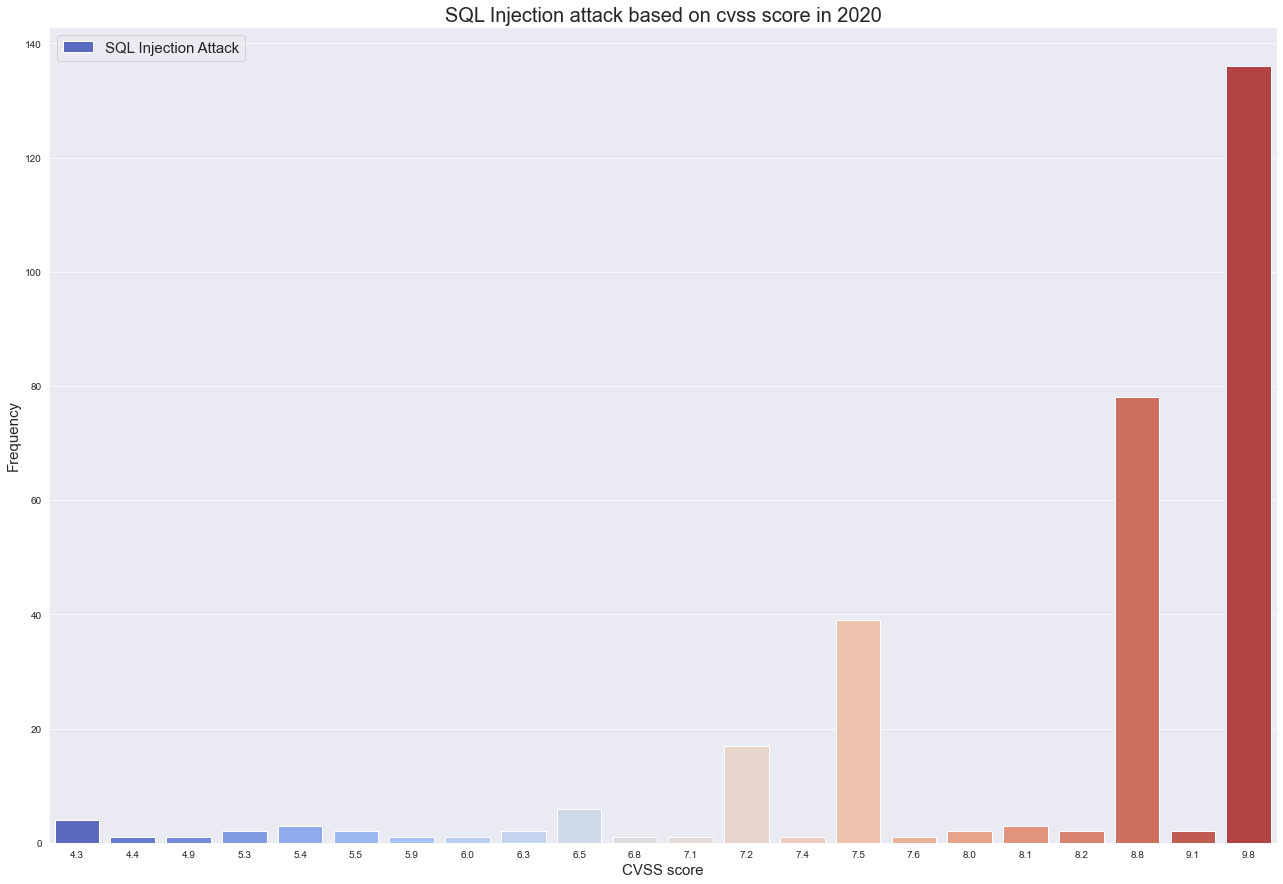

In [134]:
plt.figure(figsize = (22,15))
sns.set_style('darkgrid')

sns.barplot(x = v3.index, y = v3, label  = 'SQL Injection Attack', palette = 'coolwarm') # only SQl injection attack


plt.title('SQL Injection attack based on cvss score in 2020', fontsize = 20)
plt.xlabel('CVSS score', fontsize = 15)
plt.ylabel('Frequency', fontsize = 15)
plt.legend(loc='upper left', fontsize = 15)
plt.show() 
